# Homework 06

In class, we discussed the L&L Example 6.4.1 growth model with and without an irreversible investment constraint: $f(k) \geq c$.

$$
\max_{c(t)} \int_0^T e^{-\rho t} u(c(t)) dt \qquad st \qquad \dot k = f(k) - c - mk
$$

Boundary conditions $k_0, k_T, T$

Assume $u(c) = \log c$ and $f(k) = k^\alpha$

Assume $\alpha = 0.5, \rho = 0.1, m = 0.3$.

Have $k_0 = 1.15$ and $k_T = 0.6$

Need to get a couple of $T$ values

# Solution

The current value Hamiltonian and Lagrangian are
$$
\tilde H(s,c,t) = u(c) + \psi[f(k) - c - mk]
$$

$$
\mathcal L = u(c) + \psi[f(k) - c - mk] + \lambda[f(k) - c]
$$

The FONC are
$$
\mathcal L_c = u'(c) - \psi - \lambda = 0
$$
The co-state is
$$
\dot \psi = [m+\rho]\psi -f'(k)[ \psi + \lambda]
$$
The state transition is
$$
\dot k = [f(k) - c] - mk
$$
It'll be convenient to write that
$$
u'(c) = \frac{1}{c} \qquad \qquad f'(k) = \alpha k^{-(1-\alpha)}
$$



## Unconstrained case

In the unconstrained case, we have $\lambda=0$, so
$$
u'(c) = \psi \qquad \dot \psi = [m+\rho - f'(k)]\psi \qquad \dot k = f(k) - c - mk
$$
Our convenient functional forms imply that $c = 1/\psi$, so we can write these 2 ODEs as
$$
\dot k = f(k) - 1/\psi - mk \qquad \qquad \dot \psi = [m+\rho - f'(k)]\psi
$$
The interior nullclines are
$$
\dot k \geq 0 \implies \psi \geq \frac{1}{f(k)-mk} \qquad \qquad \dot \psi \geq 0 \implies k \geq \left(\frac{\alpha}{m+\rho}\right)^\frac{1}{(1-\alpha)}
$$
The steady state is where these hold with equality


## Constrained case

The constraint boundary is where $c = f(k)$, which happens at $\psi = u'(f(k)) = \frac{1}{f(k)}$. At this point, we have that $\psi + \lambda = u'(f(k)) = \frac{1}{f(k)}$
$$
\dot k = -mk
\qquad \qquad
\dot \psi = (m + \rho)\psi - f'(k)u'(f(k))
$$
We have no constrained nullcline for $\dot k$ as this would require $k=0$. For $\psi$, we have that
$$
\dot \psi \geq 0 \implies \psi \geq \frac{f'(k)u'(f(k))}{(m+\rho)}
$$

### k hat

Once we enter the constrained region, we have that
$$
\dot k = -mk \implies k(t) = k_T e^{m(T-t)}
$$
Suppose the time the constraint binds is $\hat t$. Then the integral for the CV scrap value is
$$
e^{\rho \hat t} \int_{\hat t}^T e^{-\rho t} \log(k_T e^{m(T-t)}) dt
$$

### ~~Free-time~~ TVC for constrained part

The value for $\hat k = k(\hat t)$ is pinned down by the constraint: $k(\hat t) = \hat k = k_T e^{m(T-\hat t)}$. So we don't need to use a free-time TVC

### The BVP

We're now in a position to solve the BVP. We know $t_0,k_0$ and $\hat t, \hat k$. We don't know $\hat t$, but once we do, then we also know $\hat k, \hat \psi$. So, our problem is to find $\hat t$ such that $(\hat k - k_0) = \int_0^{\hat t} \dot k(t) dt$. Because we are searching over an unknown $\hat t$, this makes collocation tricky... so we'll try shooting.

In [1]:
using DifferentialEquations
using BoundaryValueDiffEq
using Plots
using Base: product
using Homework06
gr(fmt=:png)

Plots.GRBackend()

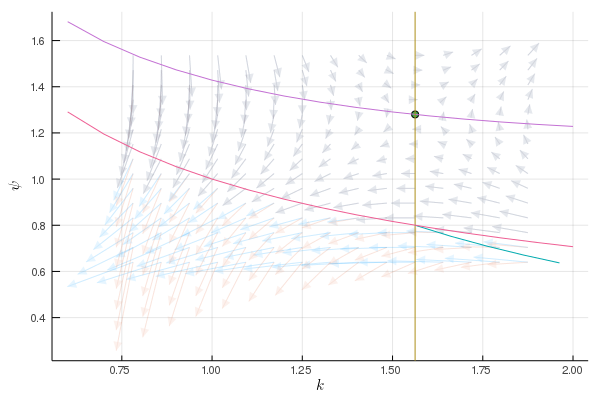

In [2]:
cmodel = ConstrGrowthModel()
umodel = UnconstrGrowthModel()
tvc = TVC()

# create a new plot
plt_quiv = plot(;legend=:topright, xlabel="\$k\$", ylabel="\$\\psi\$")

# add quivers
myquiver!(plt_quiv, umodel; scalek=0.2, arrow=arrow(:closed), label="Unconstrained", alpha=0.1)
myquiver!(plt_quiv, cmodel; scalek=0.2, arrow=arrow(:closed), label="Constrained", alpha=0.1)

# steady state
ssk, ssψ = steady_state(umodel)
scatter!(plt_quiv, [ssk],[ssψ], label="")

# nullclines
plot!(kstop(TVC()) : 0.1 : 2, k -> k_nullcline(umodel,k); label="")
vline!([ssk,]; label="")
plot!(ssk : 0.1 : 2, k -> psi_nullcline(cmodel,k); label="")

# constraint boundary
plot!(kstop(TVC()) : 0.1 : 2, k -> constr_boundary(cmodel,k); label="")

In [3]:
# solve for \hat t
tvc1 = TVC(;tmax=2.5)
tvc2 = TVC(;tmax=7.0)
tvc3 = TVC(;tmax=20.0)

sol1u = solution(umodel, tvc1, [0.6, 0.88])
sol2u = solution(umodel, tvc2, [0.6, 0.88])
sol3u = solution(umodel, tvc3, [0.6, 0.8831])
sol3u.sol0

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 14-element Array{Float64,1}:
 20.0               
 19.891153217114457 
 19.57986612903387  
 19.051785689914286 
 18.203234011147796 
 17.258175942039063 
 15.982102521765011 
 14.454340933026886 
 12.552779959634446 
 10.278873201217444 
  7.522476351075429 
  4.16591125701649  
  0.1802930919501211
  0.0               
u: 14-element Array{Array{Float64,1},1}:
 [0.6, 0.8841553820405409]               
 [0.6557881220280604, 0.9066621538265159]
 [0.7914634941698044, 0.9611128342772947]
 [0.9647355827552897, 1.0309089970738692]
 [1.1521245215490608, 1.1078564414759822]
 [1.2845507313422535, 1.1639109582486769]
 [1.392550899918655, 1.2115532171055288] 
 [1.4630460021993417, 1.245159363136609] 
 [1.5038799806447922, 1.269298889430202] 
 [1.5167362174858743, 1.2882743851271463]
 [1.4988949364526982, 1.3126728196694213]
 [1.4209582729295587, 1.3709078263342434]
 [1.1683545978947123, 1.585505323291028] 
 [1.15000000

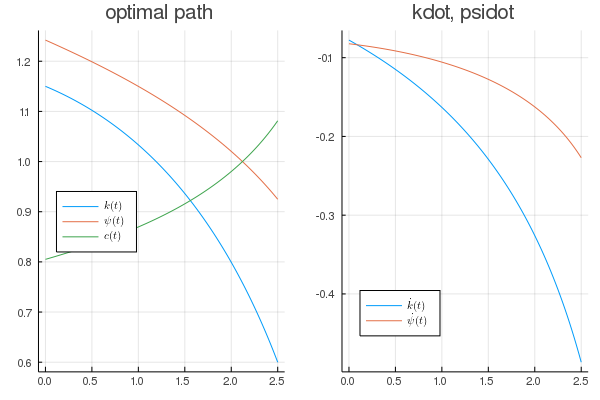

In [4]:
plot(Homework06.solutionplots(sol1u)...)

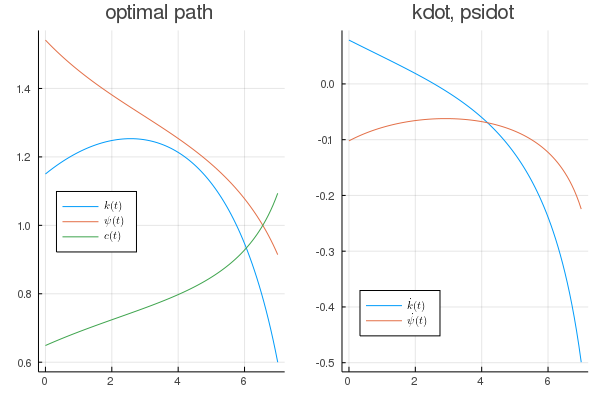

In [5]:
plot(Homework06.solutionplots(sol2u)...)

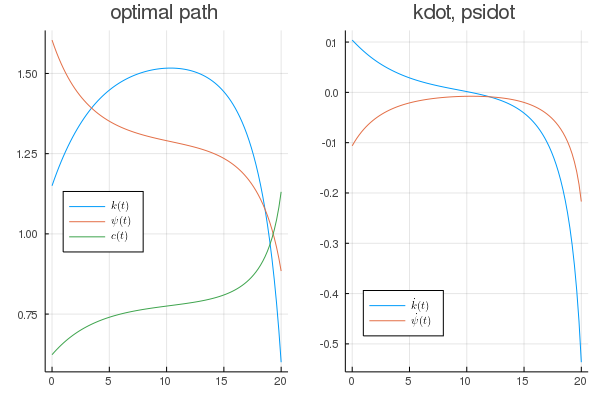

In [6]:
plot(Homework06.solutionplots(sol3u)...)

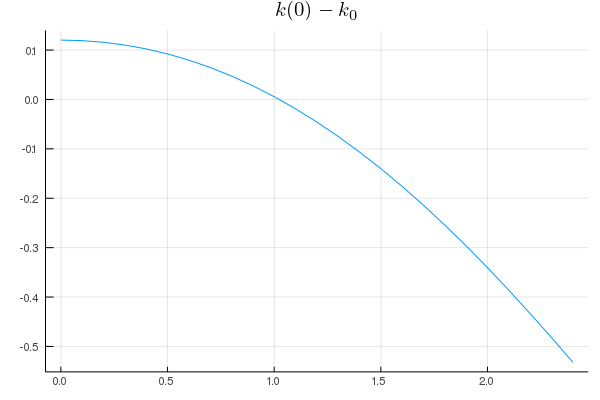

In [7]:
# solve constrained problem for \hat t
tvc = tvc1
sol = sol1u
plot(
    0 : 0.1 : tmax(tvc)-0.1, 
    t -> that_residual(cmodel,tvc,t),
    legend=:none,
    title = "\$k(0) - k_0\$"
)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     5.564179e-03              NaN
     1     6.809191e-05     2.390699e-02
     2     9.706773e-09     2.855748e-04


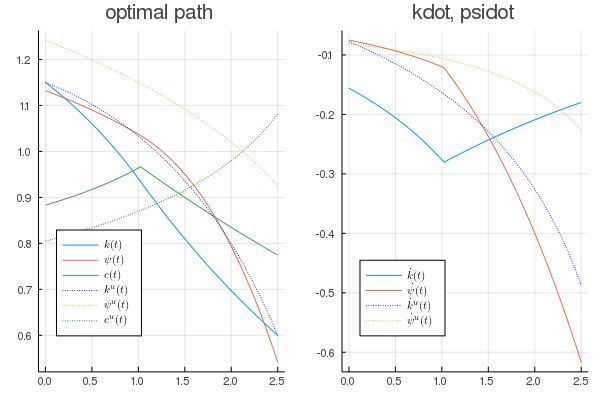

In [8]:
that_solution = find_that(cmodel, tvc, [1.0,]; show_trace=true)
that = that_solution.zero[1]
sol1c = solution(cmodel, tvc, that)
plt1, plt2 = Homework06.solutionplots(sol1c)

plot!(plt1, tgrid(sol), t -> kpath(sol, t); label="\$k^u(t)\$", linestyle=:dot, color=:blue)
plot!(plt1, tgrid(sol), t -> ψpath(sol, t); label="\$\\psi^u(t)\$", linestyle=:dot, color=:orange)
plot!(plt1, tgrid(sol), t -> consumption(sol, t); label="\$c^u(t)\$", linestyle=:dot, color=:green, legend=:bottomleft)
plot!(plt2, tgrid(sol), t -> dotk(sol, t); label="\$\\dot k^u(t)\$", linestyle=:dot, color=:blue)
plot!(plt2, tgrid(sol), t -> dotψ(sol, t); label="\$\\dot \\psi^u(t)\$", linestyle=:dot, color=:orange)
# vline!(plt1, [that,]; label="", linestyle = :dash)
# vline!(plt2, [that,]; label="", linestyle = :dash)
plot(plt1, plt2)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.076356e+00              NaN
     1     3.966925e-02     6.969665e-01
     2     8.231272e-05     2.493617e-02
     3     3.243288e-10     5.153246e-05


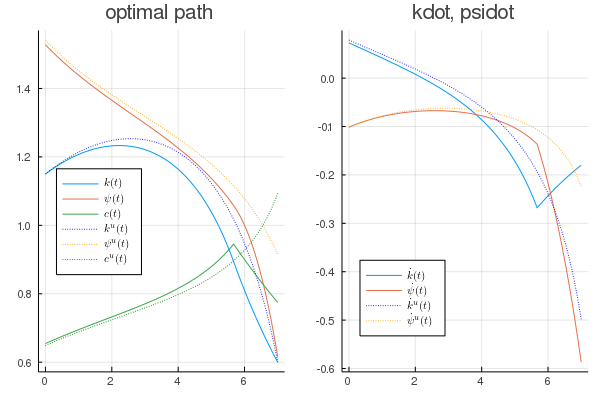

In [9]:
# solve constrained problem for \hat t
tvc = tvc2
sol = sol2u
plot(0 : 0.1 : tmax(tvc)-2, t -> that_residual(cmodel,tvc,t), legend=:none, title = "\$k(0) - k_0\$")

that_solution = find_that(cmodel, tvc, [tmax(tvc)-2,]; show_trace=true)
that = that_solution.zero[1]
sol2c = solution(cmodel, tvc, that)

plt1, plt2 = Homework06.solutionplots(sol2c)

plot!(plt1, tgrid(sol), t -> kpath(sol, t); label="\$k^u(t)\$", linestyle=:dot, color=:blue)
plot!(plt1, tgrid(sol), t -> ψpath(sol, t); label="\$\\psi^u(t)\$", linestyle=:dot, color=:orange)
plot!(plt1, tgrid(sol), t -> consumption(sol, t); label="\$c^u(t)\$", linestyle=:dot, color=:green)
plot!(plt2, tgrid(sol), t -> dotk(sol, t); label="\$\\dot k^u(t)\$", linestyle=:dot, color=:blue)
plot!(plt2, tgrid(sol), t -> dotψ(sol, t); label="\$\\dot \\psi^u(t)\$", linestyle=:dot, color=:orange)
# vline!(plt1, [that,]; label="", linestyle = :dash)
# vline!(plt2, [that,]; label="", linestyle = :dash)
plot(plt1, plt2)

Iter     f(x) inf-norm    Step 2-norm 
------   --------------   --------------
     0     1.615027e+00              NaN
     1     2.029159e-01     2.173240e-02
     2     6.508367e-03     3.678544e-03
     3     7.810617e-06     1.261186e-04
     4     4.304113e-11     1.517178e-07


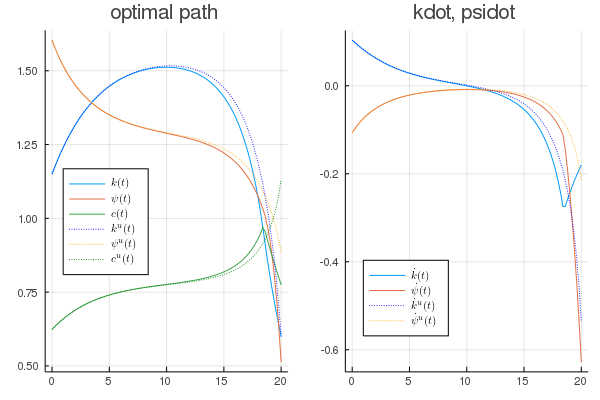

In [10]:
# solve constrained problem for \hat t
tvc = tvc3
sol = sol3u
plot(18 : 0.05 : tmax(tvc)-1.501, t -> that_residual(cmodel,tvc,t), legend=:none, title = "\$k(0) - k_0\$", ylims=(0,Inf))

that_solution = find_that(cmodel, tvc, [18.44,]; show_trace=true)
that = that_solution.zero[1]
sol3c = solution(cmodel, tvc, that)

plt1, plt2 = Homework06.solutionplots(sol3c)

plot!(plt1, tgrid(sol), t -> kpath(sol, t); label="\$k^u(t)\$", linestyle=:dot, color=:blue)
plot!(plt1, tgrid(sol), t -> ψpath(sol, t); label="\$\\psi^u(t)\$", linestyle=:dot, color=:orange)
plot!(plt1, tgrid(sol), t -> consumption(sol, t); label="\$c^u(t)\$", linestyle=:dot, color=:green)
plot!(plt2, tgrid(sol), t -> dotk(sol, t); label="\$\\dot k^u(t)\$", linestyle=:dot, color=:blue)
plot!(plt2, tgrid(sol), t -> dotψ(sol, t); label="\$\\dot \\psi^u(t)\$", linestyle=:dot, color=:orange)
# vline!(plt1, [that,]; label="", linestyle = :dash)
# vline!(plt2, [that,]; label="", linestyle = :dash)
plot(plt1, plt2)

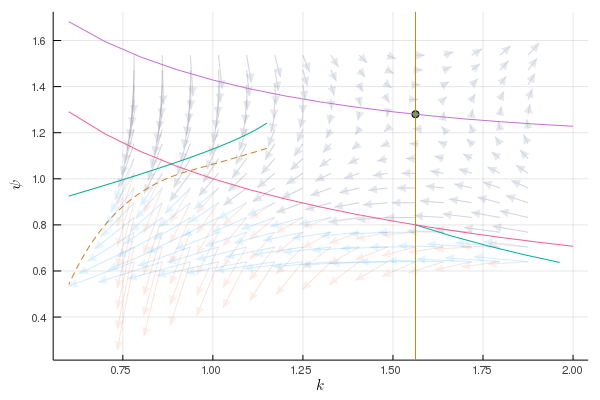

In [11]:
p = deepcopy(plt_quiv)
plot!(p, kpath(sol1c), ψpath(sol1c), label = "", linestyle=:dash) # "\$T=$(tmax(tvc1))\$")
plot!(p, kpath(sol1u), ψpath(sol1u), label = "") # "\$T=$(tmax(tvc1))\$")

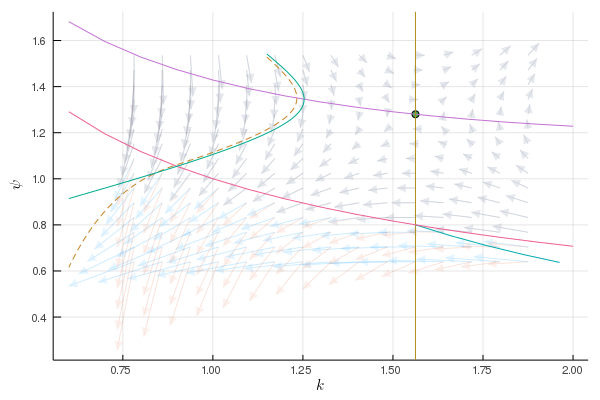

In [12]:
p = deepcopy(plt_quiv)
plot!(p, kpath(sol2c), ψpath(sol2c), label = "", linestyle=:dash) # "\$T=$(tmax(tvc1))\$")
plot!(p, kpath(sol2u), ψpath(sol2u), label = "") # "\$T=$(tmax(tvc1))\$")

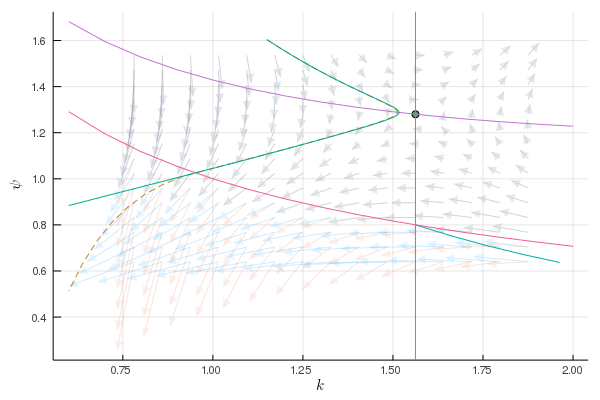

In [13]:
p = deepcopy(plt_quiv)
plot!(p, kpath(sol3c), ψpath(sol3c), label = "", linestyle=:dash) # "\$T=$(tmax(tvc1))\$")
plot!(p, kpath(sol3u), ψpath(sol3u), label = "") # "\$T=$(tmax(tvc1))\$")

### "Scrap value"

We ~~also~~ **DO NOT** need to figure out the value of entering in the second part of the problem because choosing $\hat t$ determines $k(\hat t)$ and $\psi (\hat t)$... which in turn determine $k(0)$. So we need to choose $\hat t$ to satisfy our problem. 

But, if we wanted to compute the scrap value, we could do so. First We break this up into
$$
\int_{\hat t}^T e^{-\rho t} \log(k_T e^{m(T-t)}) dt = \log(k_Te^{mT}) \int_{\hat t}^T e^{-\rho t}dt - m \int_{\hat t}^T e^{-\rho t} t dt
$$
The first piece is
$$
\log(k_Te^{mT}) \int_{\hat t}^T e^{-\rho t}dt = \log(k_Te^{mT}) \frac{e^{-\rho \hat t} - e^{-\rho T}}{\rho}
$$
The second piece we use [integration by parts](https://en.wikipedia.org/wiki/Integration_by_parts)
$$
\int_a^b u(t)v'(t)dt = uv|_a^b - \int_a^b u'(t)v(t)dt
$$
<!-- |_ asdf -->
Take $u(t) = t$ and $v'(t) = e^{-\rho t} \implies v(t) = \frac{e^{-\rho t}}{-\rho}$. Then
$$
-m\int_{\hat t}^T e^{-\rho t} t dt
= -m\frac{e^{-\rho \hat t}(\rho \hat t + 1) - e^{-\rho T}(\rho T + 1)}{\rho ^2}
= -m \frac{e^{-\rho \hat t}\hat t - e^{-\rho T} T}{\rho} - \frac{m}{\rho}\frac{e^{-\rho \hat t}- e^{-\rho T}}{\rho}
$$
Thus, we have that the current value of being at $t=\hat t$ is this gross function:
$$
V(\hat t; T, k_T)
= \int_{\hat t}^T e^{-\rho t} \log(k_T e^{m(T-t)}) dt
= \left[\log(k_T e^{mT}) - \frac m \rho \right]\frac{e^{-\rho \hat t}- e^{-\rho T}}{\rho} - m\frac{e^{-\rho \hat t}\hat t - e^{-\rho T} T}{\rho}
$$
To transform this to current values instead of the value from the perspective of $t=0$
$$
e^{\rho \hat t} V(\hat t; T, k_T)
= \left[\log(k_T e^{mT}) - \frac m \rho \right]\frac{1- e^{-\rho(T-\hat t)}}{\rho} - m\frac{\hat t - e^{-\rho (T-\hat t)} T}{\rho}
$$
We need to be able to compute $\frac{\partial V}{\partial \hat t}$ ~~and $\frac{\partial V}{\partial k(\hat t)}$~~ to get our TVC right. We can get
$$
\frac{\partial e^{\rho \hat t}V}{\partial \hat t} = -\left[\log(k_T e^{mT}) - \frac m \rho \right]e^{-\rho \hat t} + \frac m \rho e^{-\rho \hat t}\left[\rho \hat t - 1\right] = e^{-\rho \hat t}\left[m \hat t - \log (k_Te^{mT}) - \frac{2m}{\rho} \right]
$$
~~We need $\partial V / \partial k_{\hat t}$. First, we know that $k(\hat t) = k_T e^{m(T-\hat t)}$, so $k_Te^{mT} = \hat k e^{m\hat t}$~~
$$
\partial V / \partial \hat k = \frac{\partial}{\partial \hat k} \left\{ \left[\log \hat k + m\hat t - \frac m \rho \right]\frac{e^{-\rho \hat t}- e^{-\rho T}}{\rho} - m\frac{e^{-\rho \hat t}\hat t - e^{-\rho T} T}{\rho} \right\} = \frac{1}{\hat k}\frac{e^{-\rho \hat t}- e^{-\rho T}}{\rho}
$$
